## Modelling an Ace
The juptyer notebook looks at some tennis datasets taken from [The Match Charting Project](https://github.com/JeffSackmann/tennis_MatchChartingProject) and investigates factors that determine an ace. (An ace is defined as a winning serve that is not touched by the receiver). These factors are then used in a supervised learning classification algorithm to predict if a serve would be an ace. All packages needed can be found in the requirement.txt file.

-The first step is to connect to the datasets and import the dataset into a panda

In [ ]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
    
# Downloading the csv file from Match Charting Project GitHub account into pandas

#Female Serve Dataset
url = "https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-w-stats-ServeBasics.csv"
df = pd.read_csv(url,error_bad_lines=False)

#Male Serve Dataset
url_male = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-stats-ServeBasics.csv'
df_male = pd.read_csv(url_male, usecols=range(11),skip_blank_lines=True)

#Female Point by Point Breakdown
url_points = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-w-points.csv' 
df_points = pd.read_csv(url_points,error_bad_lines=False,encoding='latin-1')

#Male Point by Point Breakdown
url_male_points = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points.csv' 
df_male_points = pd.read_csv(url_male_points,error_bad_lines=False,encoding='latin-1')


Next we want to see what these datasets contains and how the data is structured.

In [2]:
df.head()

,match_id,row,pts,pts_won,aces,unret,forced_err,pts_won_lte_3_shots,wide,body,t
0,20070901-W-US_Open-R32-Agnieszka_Radwanska-Mar...,1 Total,82,43,1,1,2,21,18,38,26
1,20070901-W-US_Open-R32-Agnieszka_Radwanska-Mar...,1 1,46,24,1,1,2,13,11,17,18
2,20070901-W-US_Open-R32-Agnieszka_Radwanska-Mar...,1 2,36,19,0,0,0,8,7,21,8
3,20070901-W-US_Open-R32-Agnieszka_Radwanska-Mar...,2 Total,76,39,2,3,2,14,18,35,23
4,20070901-W-US_Open-R32-Agnieszka_Radwanska-Mar...,2 1,50,33,2,3,2,13,13,16,21


In [3]:
df_points.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20211102-W-BJK_Cup_Finals-RR-Storm_Sanders-Eli...,1,0,0,0,0,0-0,1 (1),1,0,...,1.0,False,False,False,False,True,False,1,1,3
1,20211102-W-BJK_Cup_Finals-RR-Storm_Sanders-Eli...,2,0,0,0,0,15-0,1 (2),1,0,...,1.0,False,False,False,False,True,False,1,1,1
2,20211102-W-BJK_Cup_Finals-RR-Storm_Sanders-Eli...,3,0,0,0,0,30-0,1 (3),1,0,...,NaN,False,False,True,False,False,False,2,0,6
3,20211102-W-BJK_Cup_Finals-RR-Storm_Sanders-Eli...,4,0,0,0,0,30-15,1 (4),1,0,...,0.0,False,False,False,False,False,True,2,0,0
4,20211102-W-BJK_Cup_Finals-RR-Storm_Sanders-Eli...,5,0,0,0,0,30-30,1 (5),1,0,...,1.0,False,False,False,False,True,False,1,1,1


We've got two types of datasets. One that returns point by point data and another that returns overall match event data. Both are speperated into 2 datasets by gender. To start with we will look at the point by point datasets.

Let's combine our two point by point datasets into one and see how common an ace is.

In [5]:
#Combines our two datasets 

frames = [df_points,df_male_points]
df_combine = pd.concat(frames)

In [3]:
def type_diff(df_pts):
    """
    Calculates number of 1st and 2nd serves and number of aces
    :param df: dataset 
    :returns value: No. 1st serves, 1st serve aces, No. of 2nd serves, 2nd serve aces
    """
    total_fir_sev = df_pts["1stIn"].count()
    df_fir = df_pts[(df_pts["1stIn"] == 1.0)]
    aces_fir = df_fir["isAce"].sum()

    total_sec_sev = df_pts["2ndIn"].count()
    df_sec = df_pts[(df_pts["2ndIn"] == 1.0)]
    aces_sec = df_sec["isAce"].sum()

    return (total_fir_sev,aces_fir,total_sec_sev,aces_sec)


In [6]:
overall_ace = type_diff(df_combine)
print("Overall ace percentage of dataset is: " + str(100*(overall_ace[1]+overall_ace[3])/(overall_ace[0] + overall_ace[2])))

Overall ace percentage of dataset is: 4.988293284041898


This gives us a baseline for how likely an ace is.

The first factor we can investigate is first vs second serve

In [7]:
print("first serve ace percentage is: " + str(100*(overall_ace[1])/(overall_ace[0])))
print("second serve ace percentage is: " + str(100*(overall_ace[3])/(overall_ace[2])))

first serve ace percentage is: 6.6153941288377105
second serve ace percentage is: 0.6783210269883124


Next let's investigate if there is a difference between male and female. 

In [8]:
def gender_diff(df):
    """
    Calculates total aces and total serves
    :param df: dataset 
    :returns value: No. of Aces, No. of Serves
    """
    total_fir_sev = df["1stIn"].count()
    df_fir = df[(df["1stIn"] == 1.0)]
    aces_fir = df_fir["isAce"].sum()

    total_sec_sev = df["2ndIn"].count()
    df_sec = df[(df["2ndIn"] == 1.0)]
    aces_sec = df_sec["isAce"].sum()

    total_aces = aces_sec + aces_fir
    total_serve = total_fir_sev + total_sec_sev
    ace_per = 100*(total_aces/total_serve)

    return (ace_per)

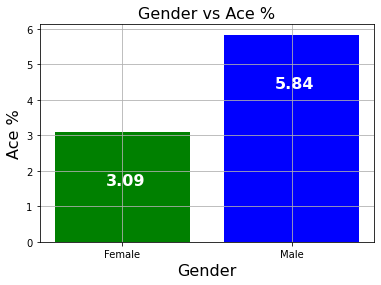

In [9]:
#Plots difference in Gender for Ace %

Gender = ["Female", "Male"]
Ratio_per_gender = [gender_diff(df_points),gender_diff(df_male_points)]

for index, value in enumerate(Ratio_per_gender):
    plt.text(index - 0.1, value -1.5, '{:.2f}'.format(value), fontsize = 16, color = 'white', weight = 'bold')

New_Colors = ['green','blue']
plt.bar(Gender, Ratio_per_gender, color=New_Colors)
plt.title('Gender vs Ace %', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
plt.grid(True)
#plt.savefig("Gender_Bar_Chart.jpg", quality = 95)
plt.show()

This tells us that for any given point a male is almost 2 times more likely to serve an ace vs a female. However how does this track on a per player per match basis. In order to investigate that we use a second set of data that returns us aggregated statistics on a per match basis rather than per point. And we then plot a box a whisker plot to see the difference per player

In [10]:
def percent(df):
    """
    Calculates % of aces, t, wide and body serves
    :param df: dataset 
    :returns df: Adds additional columns % of aces, serves for t, wide and body serves
    """
    df["t_%"] = df["t"]/df["pts"]
    df["body_%"] = df["body"]/df["pts"]
    df["wide_%"] = df["wide"]/df["pts"]
    df["aces_%"] = df["aces"]/df["pts"]
    df = df[(df["row"] == "1 Total") | (df["row"] == "2 Total")]
    df = df.drop(["unret","forced_err","pts_won_lte_3_shots"],axis=1)

    return df

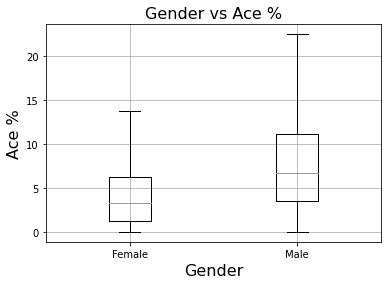

count    354800.000000
mean          4.392531
std           4.501812
min           0.000000
25%           1.294539
50%           3.278689
75%           6.264077
max          40.625000
Name: aces_%, dtype: float64 count    462600.000000
mean          8.028428
std           6.262369
min           0.000000
25%           3.529412
50%           6.722689
75%          11.111111
max          62.500000
Name: aces_%, dtype: float64


In [11]:
serve_fem = percent(df)
serve_male = percent(df_male)

female = 100*serve_fem["aces_%"]
male = 100*serve_male["aces_%"]

plt.grid(True)
plt.title('Gender vs Ace %', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
#plt.savefig("Gender_Box_Plot.jpg", quality = 95)
plt.boxplot ([female,male], labels = ["Female", "Male"], widths =0.25, showfliers=False)
plt.show()

print(100*serve_fem["aces_%"].describe(),100*serve_male["aces_%"].describe())

This result although not the purpose of this notebook is really intresting. And it would be intresting to add serve speed into this to see if that is the underlying factor for the difference between male and female ace % rates or if there are other factors at play. However this data is not easily avialable so for the time being we will use gender as another one of our factors for our algorithm along with 1st or 2nd serve.

Next we will look at the type of serve. For this the point by point datasets already categorises serves into 3 types. T, body and wide serves

In [2]:
def serve_dir(df,serve_type):
    """
    Calculates ace % for a given serve type
    :param df: dataset 
    :serve_type: Serve type: 6 = T, 5 = Body and 4 = Wide
    :returns value: Returns Ace %
    """
    dir_tot = df["1st"].str.count(serve_type).sum()+df["2nd"].str.count(serve_type).sum()

    fir_ace = df[(df["isAce"] == True) & (df["1stIn"] == 1.0)]
    fir_ace_tot = fir_ace["1st"].str.count(serve_type).sum()

    sec_ace = df[(df["isAce"] == True) & (df["2ndIn"] == 1.0)]
    sec_ace_tot = sec_ace["2nd"].str.count(serve_type).sum()

    ace_per = (fir_ace_tot + sec_ace_tot)/dir_tot

    return (100*ace_per) 

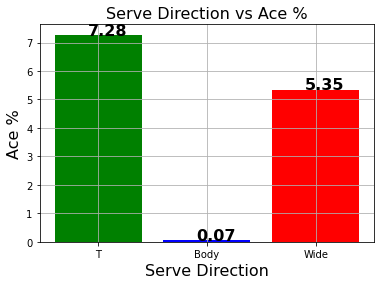

In [13]:
Serve_type = ["T", "Body", "Wide"]
Ratio_per_type = [serve_dir(df_combine,"6"), serve_dir(df_combine,"5"), serve_dir(df_combine,"4")]

Colors = ['green','blue',"red"]
for index, value in enumerate(Ratio_per_type):
    plt.text(index - 0.1, value, '{:.2f}'.format(value), fontsize = 16, weight = 'bold')
plt.bar(Serve_type, Ratio_per_type, color=Colors)
plt.title('Serve Direction vs Ace %', fontsize=16)
plt.xlabel('Serve Direction', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
plt.grid(True)
#plt.savefig("Serve_direction_bar.jpg", quality = 95)
plt.show()

We can see from the above that we have 3 significant factors. These 3 factors will all be used as inputs for creating our classification alogrithm that can determine if a serve will be an ace or not. A summary of our factors and their signifcance is given below.

In [6]:
fem_list = type_diff(df_points)
male_list = type_diff(df_male_points)
Ratio_per_type = [serve_dir(df_combine,"6"), serve_dir(df_combine,"5"), serve_dir(df_combine,"4")]

print("First serve ace percentage is: " + str(100*(fem_list[1]+male_list[1])/(fem_list[0]+male_list[0])))
print("Second serve ace percentage is: " + str(100*(fem_list[3]+male_list[3])/(fem_list[2]+male_list[2])))
print("Female serve ace percentage is: " + str(100*(fem_list[1]+fem_list[3])/(fem_list[0]+fem_list[2])))
print("Male serve ace percentage is: " + str(100*(male_list[1]+male_list[3])/(male_list[0]+male_list[2])))
print("T body serve ace percentage is: " + str(Ratio_per_type[0]))
print("Body serve ace percentage is: " + str(Ratio_per_type[1]))
print("Wide serve ace percentage is: " + str(Ratio_per_type[2]))

First serve ace percentage is: 6.6153941288377105
Second serve ace percentage is: 0.6783210269883124
Female serve ace percentage is: 3.0881177444451713
Male serve ace percentage is: 5.839713775509554
T body serve ace percentage is: 7.275913729259123
Body serve ace percentage is: 0.07075080938030351
Wide serve ace percentage is: 5.348065651135256


|  | Serve Type | Serve Type| Gender | Gender | Serve Direction | Serve Direction | Serve Direction |
| --- | --- | --- | --- | --- | --- | --- | --- |
| | 1st | 2nd | Female | Male | T | Body | Wide |
| Ace % | 6.62 | 0.68 | 3.09 | 5.84 | 7.28 | 0.07 | 5.35 |
| Factor difference | 9.74 |  | 1.89 |  | 104.00 | |  |

In [ ]:
#import sys
#!{sys.executable} -m pip install xgboost

We will use xgboost machine learning package. There are several available however because xgboost can deal with N/A it makes it an ideal choice.  

In [2]:
from xgboost import XGBClassifier
import numpy as np

The first step is structuring our dataset in a format that is useable by our xgboost algorithm and such that it only contains are variables of intrest and our outcome.

In [ ]:
#Select the 3 factors and if the point was an ace or not from our dataset
df_new = df_points[["1st","1stIn","2nd","2ndIn","isAce"]]
df_new_male = df_male_points[["1st","1stIn","2nd","2ndIn","isAce"]]


#create a new column of gender in both datasets
df_new_male["gender"] = 1.0 
df_new["gender"] = 2.0

#Combine both datasets
frames = [df_new,df_new_male]
df_combine = pd.concat(frames)


#Type of serve is within "1st" & "2nd" column but needs to be taken from the first character of these columns
conditions = [(df_combine["1st"].str.contains("4")),(df_combine["1st"].str.contains("5")),(df_combine["1st"].str.contains("6"))]
values = ["4","5","6"]
conditions_2 = [(df_combine["2nd"].str.contains("4",na=False)),(df_combine["2nd"].str.contains("5",na=False)),(df_combine["2nd"].str.contains("6",na=False))]

#Select only the first character from the "1st" & "2nd" columns
df_unclean = df_combine
df_unclean["1st_type"] = np.select(conditions,values)
df_unclean["2nd_type"] = np.select(conditions_2,values)

#Returns our cleaned data in a format that is useable by xgboost
df_graph = df_unclean[["1stIn","2ndIn","gender","1st_type","2nd_type","isAce"]]

#Converts column to numbers
df_graph['1st_type'] = pd.to_numeric(df_graph['1st_type'])
df_graph['2nd_type'] = pd.to_numeric(df_graph['2nd_type'])

Our dataset is now clean and in a format that is almost ready to be inserted into our algorithm

In [4]:
df_graph.head()

,1stIn,2ndIn,gender,1st_type,2nd_type,isAce
0,0,1.0,2.0,6,6,False
1,0,1.0,2.0,4,5,False
2,1,NaN,2.0,6,0,False
3,0,0.0,2.0,6,4,False
4,0,1.0,2.0,6,5,False


The last step is to seperate out the dataset into our input data with the three factors we are investigating and output dataset with True or False for if the point was an Ace.

In [5]:
#Input data
df_input_xg = df_graph[["1stIn","2ndIn","gender","1st_type","2nd_type"]]

#Output data
result_xg = df_graph["isAce"]

We then split our input and output further into training and test datasets using a common 80 20 split

In [6]:
from sklearn.model_selection import train_test_split
X_train_xg, X_test_xg, Y_train_xg, Y_test_xg = train_test_split(df_input_xg, result_xg, test_size=0.2)

We then create a model using the training dataset. Important to note that we adjust the algorithm using the ```scale_pos_weight``` parameter as the number of aces only occurs around 5% of the time in our dataset. Without this adjustment the model we would create would be wrong. 

In [ ]:
model = XGBClassifier(scale_pos_weight=14)
model.fit(X_train_xg, Y_train_xg)

With the model created we run it against our test dataset using the outputs in the test dataset to evaluate the accuracy of our alogrithm

In [8]:
y_pred_xg = model.predict(X_test_xg)
predictions = [round(value) for value in y_pred_xg]

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_xg, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.16%


Not bad however the accuracy does not give us the full picture. We want to understand our model better and for that we use a confusion matrix.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test_xg,predictions))
#print(classification_report(Y_test_xg,predictions))

[[78416 75171]
 [  438 10924]]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_xg,predictions))

              precision    recall  f1-score   support

       False       0.99      0.51      0.67    153587
        True       0.13      0.96      0.22     11362

   micro avg       0.54      0.54      0.54    164949
   macro avg       0.56      0.74      0.45    164949
weighted avg       0.93      0.54      0.64    164949



We can see that on the whole the algorithm was fairly successful. With a True recall (when it's an ace how often it predicted this correctly) of 96%. However the algorithm could be improved when it comes to True precision e.g. it was only correct 13% of the time when prediciting an ace. And the false recall was low as well at 51% (when it was not an ace how often it prediced this correctly).

In order to better imporve our model we would look to introduce other factors such as serve speed, spin, quality of the returned, weather conditions etc into our model. 

For this we would need to web scrap and incorporate another dataset into our exsisting data. 